# 2. Financial Data Sources and APIs
## Abdullah Karasan

At this point, I would like to introduce how we access the main financial and economics data as we are about to employ these data in financial modeling. One of the shortest way to access the data is to use `Application Program  Interface` or `API`.  Followings are some of the good reasons to use APIs:

* Downloading data directly from the websute takes time. I do not even talk about if we want to download large data set (>1 GB) into our local computer, it may turn to a torture.
* We need a subset from a large dataset. Using APIs results in easy filtering
* If we are running an analysis requiring repeated computation, then accessing it via APIs is a life-saver for us. Because, otherwise, as we can imagine, we should visit the related website everytime we need data.

## 2.1. Yahoo Finance API

Yahoo finance allows users to access the stock quotes, up-to-date news, portfolio management resources, international market data and so on. In order to access this resource, we, first, will install the `yahoo-finance` package via `pip3`:

    pip3 install yfinance

 Once we install the `yfinance`, it is time to import the Pyhton package:

In [1]:
import yfinance as yf

In the following example, we will extract a couple of stock data. However, before applying the Python application, there are few thing to know. First of all, we need to specify the tickers' of the stocks. Ticker basically symbolizes the stock and instead of writing the full name of the stock, using ticker is more convenient. 

In addition to that, datime is required because we are trying to access a data with time dimension. Start time and end time defines the time period in which we analyze the stock price. Finally, the time interval needs to be defined as we can prefer analyzing the stock price based on different time interval such as daily, weekly, monthly, or yearly.

Let's extract daily stock price of `Apple` between 01.01.2010-04.09.2020.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [3]:
stock = ['^GSPC','AAPL','MSFT','INTC']
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,4,9)
SP = yf.download(stock,start=start,end = end, interval='1d')

[*********************100%***********************]  4 of 4 downloaded


Now, we have the Apple stock price within specified period. 

In [4]:
SP.head()

Adj Close                         Close                         \
                AAPL   INTC   MSFT    ^GSPC   AAPL   INTC   MSFT    ^GSPC   
Date                                                                        
2009-12-31     26.01  14.72  23.86  1115.10  30.10  20.40  30.48  1115.10   
2010-01-04     26.42  15.06  24.23  1132.99  30.57  20.88  30.95  1132.99   
2010-01-05     26.46  15.06  24.23  1136.52  30.63  20.87  30.96  1136.52   
2010-01-06     26.04  15.01  24.09  1137.14  30.14  20.80  30.77  1137.14   
2010-01-07     26.00  14.86  23.84  1141.69  30.08  20.60  30.45  1141.69   

             High         ...    Low            Open                         \
             AAPL   INTC  ...   MSFT    ^GSPC   AAPL   INTC   MSFT    ^GSPC   
Date                      ...                                                 
2009-12-31  30.48  20.72  ...  30.48  1114.81  30.45  20.60  30.98  1126.60   
2010-01-04  30.64  21.03  ...  30.59  1116.56  30.49  20.79  30.62  1116.56   
2010-01-05  30.80  20.99  ...  30.64  1129.66  30.66  20.94  30.85  1132.66   
2010-01-06  30.75  20.93  ...  30.52  1133.95  30.63  20.81  30.88  1135.71   
2010-01-07  30.29  20.76  ...  30.19  1131.32  30.25  20.73  30.63  1136.27   

               Volume                                  
                 AAPL      INTC      MSFT       ^GSPC  
Date                                                   
2009-12-31   88102700  26429200  31929700  2076990000  
2010-01-04  123432400  47800900  38409100  3991400000  
2010-01-05  150476200  52357700  49749600  2491020000  
2010-01-06  138040000  40037400  58182400  4972660000  
2010-01-07  119282800  54041500  50559700  5270680000  

[5 rows x 24 columns]

As you notice, we have open, `high`, `low`, `close`, `adjusted close` prices and `volume` with date index. It does not make sense to work with all these data. So, we select closing price to move forward.

In [5]:
SP_close=SP.Close

Now, we have closing price of Apple.

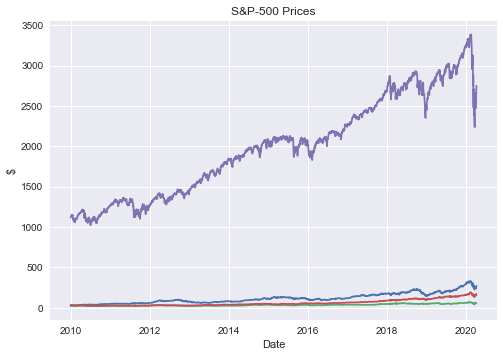

In [6]:
plt.plot(SP_close)
plt.title('S&P-500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

## 2.2. Federal Reserve Economic Data (FRED)  

Using `FRED` API, we are allowed to retrieve economic data from the `FRED` website hosted by the `Economic Research Division of the Federal Reserve Bank of St. Louis`. 

In order to have your FRED API, please visit this [website](https://research.stlouisfed.org/docs/api/api_key.html) first and follow the necessary steps. Let's move on.

As always, first install the `fredapi` Python library. Then, import the `fredapi` as `Fred`.

In [ ]:
pip3 install fredapi

In [7]:
from fredapi import Fred
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')

As we access very very large database, it is not possible to observe data simply by typing `.head()`. Instead, we need to search to locate which data we are looking for. I would like to retrive economic growth data but there is plenty versions of it. Of them, we choose the one that serves my purpose best. we use `growth` as keyword. We can try any keyword of your choice.

In [8]:
fred.search('interest')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
FEDFUNDS,FEDFUNDS,2020-08-19,2020-08-19,Effective Federal Funds Rate,1954-07-01,2020-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2020-08-05 15:22:01-05:00,96,Averages of daily figures. The federal funds ...
DFF,DFF,2020-08-19,2020-08-19,Effective Federal Funds Rate,1954-07-01,2020-08-17,"Daily, 7-Day",D,Percent,%,Not Seasonally Adjusted,NSA,2020-08-18 15:23:14-05:00,82,The federal funds rate is the interest rate at...
DGS10,DGS10,2020-08-19,2020-08-19,10-Year Treasury Constant Maturity Rate,1962-01-02,2020-08-17,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-08-18 15:23:04-05:00,97,For further information regarding treasury con...
BAMLH0A0HYM2,BAMLH0A0HYM2,2020-08-19,2020-08-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2020-08-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2020-08-19 07:07:03-05:00,100,The ICE BofA Option-Adjusted Spreads (OASs) ar...
T10Y2Y,T10Y2Y,2020-08-19,2020-08-19,10-Year Treasury Constant Maturity Minus 2-Yea...,1976-06-01,2020-08-18,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-08-18 16:01:06-05:00,100,"Starting with the update on June 21, 2019, the..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M13026USM156NNBR,M13026USM156NNBR,2020-08-19,2020-08-19,"Yield on High Grade Industrial Bonds, Aaa Rati...",1900-01-01,1972-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2012-08-20 08:17:04-05:00,12,"From January 1900-December 1928, These Indexes..."
DISCNTD8,DISCNTD8,2020-08-19,2020-08-19,Federal Reserve Bank of St. Louis Basic Discou...,1914-11-16,2002-11-07,Not Applicable,NA,Percent,%,Not Seasonally Adjusted,NSA,2003-09-09 08:51:48-05:00,12,Historical dates of changes and rates.
M13035USM156NNBR,M13035USM156NNBR,2020-08-19,2020-08-19,"Yields on Corporate Bonds, Highest Rating for ...",1919-01-01,1968-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2012-08-20 08:17:22-05:00,12,Data Refer To Aaa Grade Bonds. Data Were Check...


For instance, the data in the first row called 'FEDFUNDS', which is `Effective Federal Funds Rate`. Now, we filter this data. To do that, we type `fred.get_series('series id')`. `Series id` locates in the left-most part of the fred search result.

In [9]:
interest=fred.get_series('FEDFUNDS')

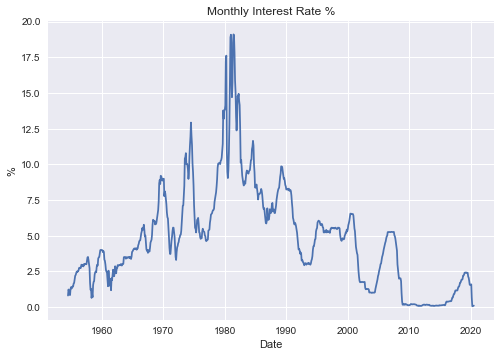

In [10]:
plt.plot(interest)
plt.title('Monthly Interest Rate %')
plt.ylabel('%')
plt.xlabel('Date')
plt.show()

## 2.3. Quandl 

Quandl is a source for financial, economic, and alternative datasets, which is used worldwide. The procedure that we need to follow to access the data is not very different from that of FRED. Thus, we need to first this [website](https://www.quandl.com/tools/api) and the bottom of the page you see `Sign Up` button. Once you click on it and follow the required steps, you have your Quandl API.

After having the API, we need to install the Python library for Quandl, which is `quandl`. Then, once we import `quandl`, we are ready to play with the data of our choice.

    !pip install quandl

In [11]:
import quandl

We are ready to move on and we would like to retrieve `WTI Crude Oil Price`from US Department of Energy. Once we run the following code, we can observe what we get by `.head()`

In [12]:
oil=quandl.get("EIA/PET_RWTC_D", authtoken="sezjeVxkKghvxARoxQAo", start_date="2010-01-01", end_date="2020-01-01")

In [13]:
oil.head()

,Value
Date,
2010-01-04,81.52
2010-01-05,81.74
2010-01-06,83.12
2010-01-07,82.60
2010-01-08,82.74


Here, we again choose close oil price and plot it.

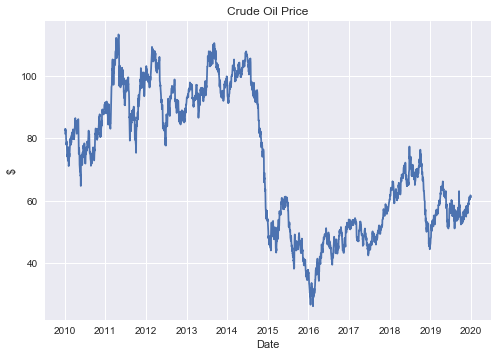

In [14]:
plt.plot(oil)
plt.title('Crude Oil Price')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

## 2.4. CRSP and Compustat

Center for `Research in Security Prices` (CRSP) hosts wide range of financial data starting from December 1963. Here are some data that can be found in CRSP:

* US Stock Databases
* Historical Indexes
* US Index History Files - Intraday
* US Treasury Database
* Survivor-Bias-Free US Mutual Funds
* Cap-Based Portfolio Index


It sounds quite appealing, doesn't it? However, it is not freely available. Anyway, for those who has subscription, we briefly introduce a few steps about retreiving data from CRSP. To access CRSP, it is required to install `WRDS` (Wharton Research Data Service), which hosts CRSP along with many other database. Then, import the `wrds` library.

    !pip3 install wrds

In [35]:
import wrds

After installation, as it requires subscription, we need to type `user name` and `password` by connecting WRDS database. After this step, we are ready to extract the dataset we arelooking for.

    db = wrds.Connection()

    bid_ask = db.raw_sql('select cusip,permno,date,bidlo,askhi from crsp.dsf LIMIT 100')

In [83]:
bid_ask

,cusip,permno,date,bidlo,askhi
0,92189F47,12744.0,2011-09-14,24.499599,24.580000
1,92189F47,12744.0,2011-09-15,24.430000,24.545000
2,92189F47,12744.0,2011-09-16,24.530001,24.629999
3,92189F47,12744.0,2011-09-19,24.280100,24.330000
4,92189F47,12744.0,2011-09-20,24.139999,24.280001
...,...,...,...,...,...
95,92189F47,12744.0,2012-01-30,24.600000,24.650000
96,92189F47,12744.0,2012-01-31,24.709999,24.799999
97,92189F47,12744.0,2012-02-01,24.743999,24.743999
98,92189F47,12744.0,2012-02-02,24.825500,24.900000


## 2.5. World Bank Data

Eventually, I would like to introduce another database called `World Bank Database`, which is quite comprehensive and include many development indicators. It is free and open access to global development data and it is rather user-friendly. Let's get started to learn how to extract data from World Bank Database.

As usual, first we install the required Python package via `pip` and then import library `wbdata`

    pip3 install world_bank_data

In [15]:
import world_bank_data as wb

After import the world bank library, we access the list of databases by:

In [16]:
wb.get_sources()

,lastupdated,name,code,description,url,dataavailability,metadataavailability,concepts
id,,,,,,,,
1,2019-10-23,Doing Business,DBS,,,Y,Y,3
2,2020-08-18,World Development Indicators,WDI,,,Y,Y,3
3,2019-11-07,Worldwide Governance Indicators,WGI,,,Y,Y,3
5,2016-03-21,Subnational Malnutrition Database,SNM,,,Y,Y,3
6,2019-12-02,International Debt Statistics,IDS,,,Y,Y,3
...,...,...,...,...,...,...,...,...
76,2018-01-22,Remittance Prices Worldwide (Sending Countries),RWS,,,Y,N,3
77,2018-01-22,Remittance Prices Worldwide (Receiving Countries),RWR,,,Y,N,3
78,2020-07-10,ICP 2017,IC7,,,Y,Y,4


As we saw before, World Bank data is compherensive and include different databases as you see above. Before moving forward, we should define which one we want to work with. For the sake of practice, we choose number 2 (2 is the number of the data source), which is `World Development Indicators`. To make a selection, we specify the source number, which is denoted on the left of the databases. It is 2 for `World Development Indicators`. Once we denote the source number as 2, we have full list of variables that `World Development Indicators` includes:

In [17]:
wb.search_indicators('', source=2)

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
AG.AGR.TRAC.NO,"Agricultural machinery, tractors",,World Development Indicators,Agricultural machinery refers to the number of...,"Food and Agriculture Organization, electronic ...",Agriculture & Rural Development
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,,World Development Indicators,Fertilizer consumption measures the quantity o...,"Food and Agriculture Organization, electronic ...",Agriculture & Rural Development
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,,World Development Indicators,Fertilizer consumption measures the quantity o...,"Food and Agriculture Organization, electronic ...",Agriculture & Rural Development
AG.LND.AGRI.K2,Agricultural land (sq. km),,World Development Indicators,Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...","Agriculture & Rural Development ,Climate Change"
AG.LND.AGRI.ZS,Agricultural land (% of land area),,World Development Indicators,Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...","Agriculture & Rural Development ,Climate Chan..."
...,...,...,...,...,...,...
VC.IDP.TOCV,"Internally displaced persons, total displaced ...",,World Development Indicators,Internally displaced persons are defined accor...,The Internal Displacement Monitoring Centre (h...,Public Sector
VC.IHR.PSRC.FE.P5,"Intentional homicides, female (per 100,000 fem...",,World Development Indicators,"Intentional homicides, female are estimates of...",UN Office on Drugs and Crime's International H...,
VC.IHR.PSRC.MA.P5,"Intentional homicides, male (per 100,000 male)",,World Development Indicators,"Intentional homicides, male are estimates of u...",UN Office on Drugs and Crime's International H...,


Suppose that we want to retrieve consumer price index data but do not know how to call it. It is easy just use the keyword such as inflation or price. In order to call the variable, we use the abbreviation, on the left hand side of the variable. Once we type `inflation` keyword, we have the following:

In [18]:
wb.search_indicators('unemployment', source=2)


,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
per_lm_alllm.adq_pop_tot,Adequacy of unemployment benefits and ALMP (% ...,,World Development Indicators,Total transfer amount received by all benefici...,ASPIRE,Social Protection & Labor
per_lm_alllm.ben_q1_tot,Benefit incidence of unemployment benefits and...,,World Development Indicators,Percentage of benefits going to the 1st quinti...,ASPIRE,Social Protection & Labor
per_lm_alllm.cov_pop_tot,Coverage of unemployment benefits and ALMP (% ...,,World Development Indicators,Percentage of population participating in Soci...,ASPIRE,Social Protection & Labor
per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...,,World Development Indicators,Percentage of population participating in Soci...,ASPIRE,Social Protection & Labor
per_lm_alllm.cov_q2_tot,Coverage of unemployment benefits and ALMP in ...,,World Development Indicators,Percentage of population participating in Soci...,ASPIRE,Social Protection & Labor
per_lm_alllm.cov_q3_tot,Coverage of unemployment benefits and ALMP in ...,,World Development Indicators,Percentage of population participating in Soci...,ASPIRE,Social Protection & Labor
per_lm_alllm.cov_q4_tot,Coverage of unemployment benefits and ALMP in ...,,World Development Indicators,Percentage of population participating in Soci...,ASPIRE,Social Protection & Labor
per_lm_alllm.cov_q5_tot,Coverage of unemployment benefits and ALMP in ...,,World Development Indicators,Percentage of population participating in Soci...,ASPIRE,Social Protection & Labor
SL.UEM.1524.FE.NE.ZS,"Unemployment, youth female (% of female labor ...",,World Development Indicators,Youth unemployment refers to the share of the ...,"International Labour Organization, ILOSTAT dat...",Social Protection & Labor


`FP.CPI.TOTL.ZG` is the input we feed the code while extracting the consumer prices. Now, it is time to decide which country we are going examine. Let's continue with `USA` but I again do not know how to call it. No worries, the following code is for you. Just type a keyword for `USA`:

In [19]:
wb.search_countries('united')

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ARE,AE,United Arab Emirates,Middle East & North Africa,,High income,Not classified,Abu Dhabi,54.370500,24.4764
GBR,GB,United Kingdom,Europe & Central Asia,,High income,Not classified,London,-0.126236,51.5002
USA,US,United States,North America,,High income,Not classified,Washington D.C.,-77.032000,38.8895


So, `USA` is the abbreviation that we are about to use. Final step before extracting the data is deciding the time interval. Suppose that our analysis period covers between 01-01-2010 and 12-01-2019. 

Using `wbdata.get_series`, we form our data for USA inflation. 

In [20]:
unemployment = wb.get_series('SL.UEM.TOTL.NE.ZS',country='USA', date='2010:2020', id_or_value='id', simplify_index=True)
unemployment

Year
2010    9.6334
2011    8.9492
2012    8.0694
2013    7.3749
2014    6.1675
2015    5.2800
2016    4.8692
2017    4.3552
2018    3.8956
2019    3.6692
Name: SL.UEM.TOTL.NE.ZS, dtype: float64

In [21]:
unemployment_extended = wb.get_series('SL.UEM.TOTL.NE.ZS',country=['USA','GB'], date='2010:2020', id_or_value='id', simplify_index=True)
unemployment_extended

Country  Year
GBR      2010    7.7866
         2011    8.0377
         2012    7.8846
         2013    7.5242
         2014    6.1096
         2015    5.3003
         2016    4.8097
         2017    4.3300
         2018    3.9959
         2019    3.7372
USA      2010    9.6334
         2011    8.9492
         2012    8.0694
         2013    7.3749
         2014    6.1675
         2015    5.2800
         2016    4.8692
         2017    4.3552
         2018    3.8956
         2019    3.6692
Name: SL.UEM.TOTL.NE.ZS, dtype: float64

Let's now try with multiple countries, for instance India, Turkey, Chine, with a different data, say per capita Gross Domestic Product. First, we search for the variable and the name of the countries:

In [22]:
wb.search_indicators('gdp', source=2)

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
BG.GSR.NFSV.GD.ZS,Trade in services (% of GDP),,World Development Indicators,Trade in services is the sum of service export...,"International Monetary Fund, Balance of Paymen...","Economy & Growth,Private Sector,Trade"
BM.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net outflows (% of ...",,World Development Indicators,Foreign direct investment refers to direct inv...,"International Monetary Fund, Balance of Paymen...","Economy & Growth,Financial Sector"
BN.CAB.XOKA.GD.ZS,Current account balance (% of GDP),,World Development Indicators,Current account balance is the sum of net expo...,"International Monetary Fund, Balance of Paymen...",Economy & Growth
BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)",,World Development Indicators,Foreign direct investment are the net inflows ...,"International Monetary Fund, International Fin...","Economy & Growth,Financial Sector ,Climate Change"
BX.TRF.PWKR.DT.GD.ZS,"Personal remittances, received (% of GDP)",,World Development Indicators,Personal remittances comprise personal transfe...,World Bank staff estimates based on IMF balanc...,"Economy & Growth,Financial Sector"
...,...,...,...,...,...,...
SH.STA.MMRT,"Maternal mortality ratio (modeled estimate, pe...",,World Development Indicators,Maternal mortality ratio is the number of wome...,"WHO, UNICEF, UNFPA, World Bank Group, and the ...","Health ,Gender,Aid Effectiveness"
SH.XPD.CHEX.GD.ZS,Current health expenditure (% of GDP),,World Development Indicators,Level of current health expenditure expressed ...,World Health Organization Global Health Expend...,Health
SH.XPD.GHED.GD.ZS,Domestic general government health expenditure...,,World Development Indicators,Public expenditure on health from domestic sou...,World Health Organization Global Health Expend...,Health


`NY.GDP.PCAP.CD` is the short name of the `GDP per capita (current US$)`

In [23]:
wb.search_countries('india')

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
IND,IN,India,South Asia,South Asia,Lower middle income,IBRD,New Delhi,77.225,28.6353


In [24]:
wb.search_countries('turkey')

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
TUR,TR,Turkey,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Ankara,32.3606,39.7153


In [25]:
wb.search_countries('china')

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
CHN,CN,China,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,IBRD,Beijing,116.286,40.0495
HKG,HK,"Hong Kong SAR, China",East Asia & Pacific,,High income,Not classified,,114.109,22.3964
MAC,MO,"Macao SAR, China",East Asia & Pacific,,High income,Not classified,,113.550,22.1667
TWN,TW,"Taiwan, China",East Asia & Pacific,,High income,Not classified,,NaN,NaN


In [78]:
gdp = wb.get_series('NY.GDP.PCAP.CD',country=['IND','TUR','CHN'], date='2010:2020', id_or_value='id', simplify_index=True )
gdp

Country  Year
CHN      2010     4550.453596
         2011     5618.132491
         2012     6316.918863
         2013     7050.645920
         2014     7678.599432
         2015     8066.942424
         2016     8147.938148
         2017     8879.438149
         2018     9976.676822
         2019    10261.679128
IND      2010     1357.563719
         2011     1458.103527
         2012     1443.879529
         2013     1449.605912
         2014     1573.881492
         2015     1605.605434
         2016     1732.564262
         2017     1981.651050
         2018     2005.863005
         2019     2104.145900
TUR      2010    10672.389246
         2011    11335.510510
         2012    11707.259712
         2013    12519.391426
         2014    12095.854572
         2015    10948.724607
         2016    10820.633842
         2017    10513.648432
         2018     9370.176355
         2019     9042.492983
Name: NY.GDP.PCAP.CD, dtype: float64

# Conclusion

To wrap up, this lesson is an important and complementary part of the subsequent Python for finance lesson because it facilitates our access to the data sources and makes us save considerable amount of time.